<h1> UK ROAD ACCIDENT DATA ANALYSIS </h1>
<h2> INCLUSIVE YEAR 20219 - 2022 </h2>

<h4> ANALYST: PALILLO, CARL MENARD T. </h4>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
accident = pd.read_csv('datasets\\accident_data.csv')

In [3]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
accident.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

<h1> FILL NA </h1>

In [6]:
accident['Latitude'] = accident['Latitude'].fillna(accident['Latitude'].mode()[0])
accident['Longitude'] = accident['Longitude'].fillna(accident['Longitude'].mode()[0])
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].fillna('unknown road surface condition')
accident['Road_Type'] = accident['Road_Type'].fillna('unknown Road Type')
accident['Weather_Conditions'] = accident['Weather_Conditions'].fillna('unknown Weather Conditions')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].fillna(accident['Urban_or_Rural_Area'].mode()[0])


In [7]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [8]:
accident['Accident_Severity'] = accident['Accident_Severity'].astype('category')
accident['Latitude'] = accident['Latitude'].astype('category')
accident['Light_Conditions'] = accident['Light_Conditions'].astype('category')
accident['District Area'] = accident['District Area'].astype('category')
accident['Longitude'] = accident['Longitude'].astype('category')
accident['Road_Surface_Conditions'] = accident['Road_Surface_Conditions'].astype('category')
accident['Road_Type'] = accident['Road_Type'].astype('category')
accident['Urban_or_Rural_Area'] = accident['Urban_or_Rural_Area'].astype('category')
accident['Weather_Conditions'] = accident['Weather_Conditions'].astype('category')
accident['Vehicle_Type'] = accident['Vehicle_Type'].astype('category')

In [9]:
accident.dtypes

Index                        object
Accident_Severity          category
Accident Date                object
Latitude                   category
Light_Conditions           category
District Area              category
Longitude                  category
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

<h1> CONVERTING DATA FIELD INTO DATE TIME DATA TYPE </h1>

In [10]:
accident['Accident Date'] = accident['Accident Date'].astype('str')
accident.dtypes
accident['Accident Date'] = accident['Accident Date'].str.strip()
accident['Accident Date'] = accident['Accident Date'].str.replace('/','-')

In [11]:
accident['Accident Date'] = pd.to_datetime(accident['Accident Date'],dayfirst = True, errors = 'coerce')

In [12]:
accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [13]:
accident['Year'] = accident['Accident Date'].dt.year
accident['Month'] = accident['Accident Date'].dt.month
accident['Day'] = accident['Accident Date'].dt.day
accident['DayOfWeek'] = accident['Accident Date'].dt.dayofweek

In [14]:
accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,unknown Road Type,Urban,unknown Weather Conditions,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,unknown Road Type,Urban,unknown Weather Conditions,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [15]:
df_2022 = accident[accident['Year'] == 2022]

In [16]:
print(f"total number of accident in 2022 is {df_2022['Light_Conditions'].value_counts().sum()}")

total number of accident in 2022 is 144419


In [17]:
df_2022['Light_Conditions'].value_counts()

Light_Conditions
Daylight                       107768
Darkness - lights lit           27544
Darkness - no lighting           7302
Darkness - lighting unknown      1317
Darkness - lights unlit           488
Name: count, dtype: int64

<h1>Insights No.1</h1>

CONTRAY TO POPULAR BELIEF THAT MOST HAPPENS IN DARKNESS OR AT NIGHT TIME. MAJORITY OF THE ACCIDENT HAPPENDS ON DAYLIGHT ABOUT 74.62% OF THE TOTAL ACCIDENTS IN 2022 HAPPENDS DURING DAYLIGHT


In [18]:
df_2022['Weather_Conditions'].value_counts()

Weather_Conditions
Fine no high winds            115970
Raining no high winds          15195
Other                           4300
Snowing no high winds           2923
unknown Weather Conditions      2654
Raining + high winds            1140
Fine + high winds               1051
Fog or mist                      902
Snowing + high winds             284
Name: count, dtype: int64

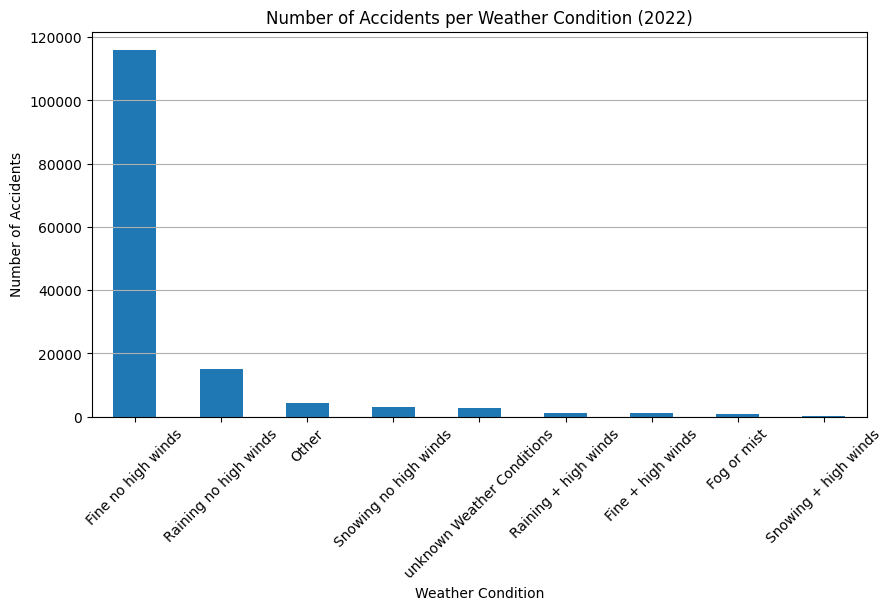

In [19]:
import matplotlib.pyplot as plt


weather_counts = df_2022['Weather_Conditions'].value_counts()


plt.figure(figsize=(10, 5))
weather_counts.plot(kind='bar')


plt.title('Number of Accidents per Weather Condition (2022)')
plt.xlabel('Weather Condition',)
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)

plt.grid(axis='y')
plt.show()


<h1>Insights No.2</h1>

OUT OF THE TOTAL 144419 ACCIDENT RECORDED. 74.62%(115970)OCCURED UBDER WEATHER CONDITIONS DESCRIBED AS  'Fine no high winds'. THIS SUGGESTS THAT EVEN IN SEEINGLY FAVORABLE CONDITIONS, ACCIDENT REMAIN HIGHLY PREVALENT.


In [20]:
casualty_2022 = df_2022.groupby(['Weather_Conditions','Vehicle_Type'])['Number_of_Casualties'].count()

In [21]:
casualty_2022


Weather_Conditions          Vehicle_Type                        
Fine + high winds           Agricultural vehicle                      2
                            Bus or coach (17 or more pass seats)     34
                            Car                                     831
                            Data missing or out of range              0
                            Goods 7.5 tonnes mgw and over            27
                                                                   ... 
unknown Weather Conditions  Other vehicle                            18
                            Pedal cycle                               0
                            Ridden horse                              0
                            Taxi/Private hire car                    62
                            Van / Goods 3.5 tonnes mgw or under     130
Name: Number_of_Casualties, Length: 144, dtype: int64

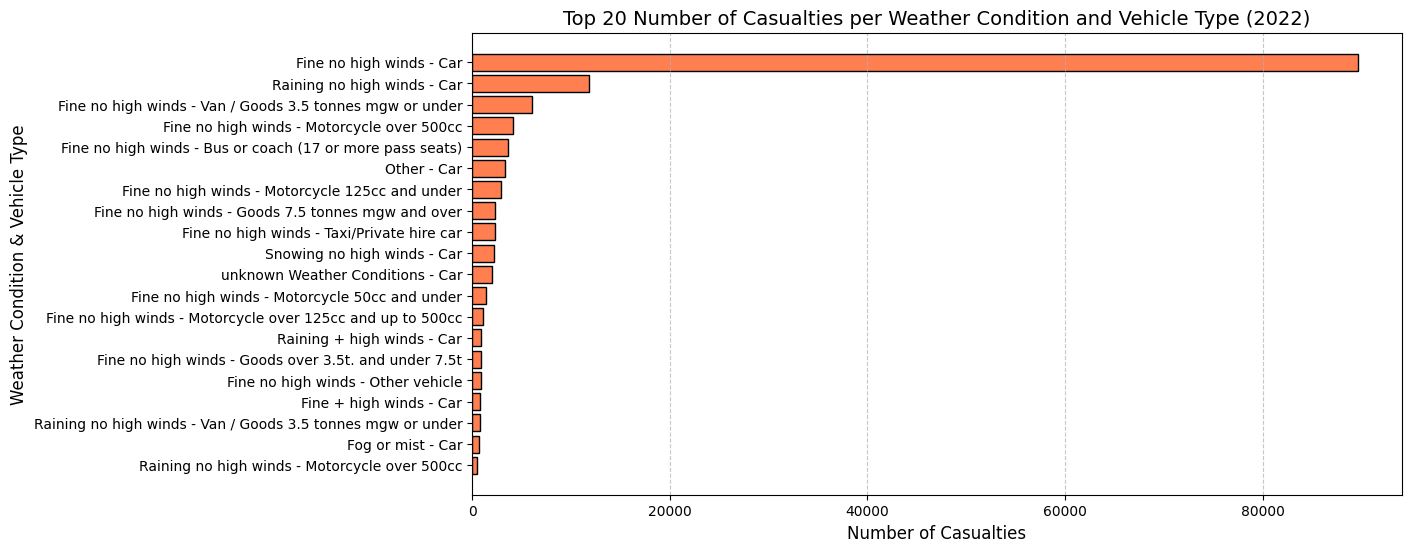

In [22]:
import matplotlib.pyplot as plt


casualty_2022 = df_2022.groupby(['Weather_Conditions', 'Vehicle_Type'])['Number_of_Casualties'].count().reset_index()


casualty_2022 = casualty_2022.sort_values(by='Number_of_Casualties', ascending=False).head(20)


labels = casualty_2022['Weather_Conditions'].astype(str) + " - " + casualty_2022['Vehicle_Type'].astype(str)


plt.figure(figsize=(12, 6))
plt.barh(labels, casualty_2022['Number_of_Casualties'], color='coral', edgecolor='black')


plt.title('Top 20 Number of Casualties per Weather Condition and Vehicle Type (2022)', fontsize=14)
plt.xlabel('Number of Casualties', fontsize=12)
plt.ylabel('Weather Condition & Vehicle Type', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [23]:
df_exam3 = df_2022[df_2022['Weather_Conditions']== 'Fine no high winds']

In [24]:
df_exam4 = df_2022.groupby(['Vehicle_Type','Urban_or_Rural_Area'])['Number_of_Casualties'].size()

In [25]:
df_exam4.unstack()

Urban_or_Rural_Area,Rural,Unallocated,Urban
Vehicle_Type,,,
Agricultural vehicle,127,0,172
Bus or coach (17 or more pass seats),1247,0,3284
Car,39707,0,72061
Data missing or out of range,0,0,0
Goods 7.5 tonnes mgw and over,1159,0,1804
Goods over 3.5t. and under 7.5t,391,0,716
Minibus (8 - 16 passenger seats),139,0,262
Motorcycle 125cc and under,928,0,2651
Motorcycle 50cc and under,591,0,1144


In [61]:
accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  category      
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  category      
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<h1>INSIGHT NO.3</h1>

ON 2022, UPON CLOSER EXAMINATION OF THE VEJHICLE TYPE ACCIDENTS, MOST OF THE ACCIDENT WAS IN THE VEHICLE TYPE 'CAR', 72061 ACCIDENT OR 64% OF THE TOTAL ACCIDENT HAPPEN ON THE RURAL AREAS

In [26]:
df_exam5 = df_exam3.groupby(['Vehicle_Type','Urban_or_Rural_Area', 'Accident_Severity'])['Number_of_Casualties'].size()

In [27]:
df_exam5.unstack()

Accident_Severity                                          Fatal  Serious  \
Vehicle_Type                          Urban_or_Rural_Area                   
Agricultural vehicle                  Rural                    1       21   
                                      Unallocated              0        0   
                                      Urban                    1       12   
Bus or coach (17 or more pass seats)  Rural                   16      146   
                                      Unallocated              0        0   
                                      Urban                    7      356   
Car                                   Rural                  680     5015   
                                      Unallocated              0        0   
                                      Urban                  360     7115   
Data missing or out of range          Rural                    0        0   
                                      Unallocated              0        0   
                                      Urban                    0        0   
Goods 7.5 tonnes mgw and over         Rural                   13      126   
                                      Unallocated              0        0   
                                      Urban                    5      189   
Goods over 3.5t. and under 7.5t       Rural                    8       45   
                                      Unallocated              0        0   
                                      Urban                    3       76   
Minibus (8 - 16 passenger seats)      Rural                    1       15   
                                      Unallocated              0        0   
                                      Urban                    1       24   
Motorcycle 125cc and under            Rural                    8      126   
                                      Unallocated              0        0   
                                      Urban                   17      271   
Motorcycle 50cc and under             Rural                    8       75   
                                      Unallocated              0        0   
                                      Urban                    7      118   
Motorcycle over 125cc and up to 500cc Rural                    6       61   
                                      Unallocated              0        0   
                                      Urban                    3       93   
Motorcycle over 500cc                 Rural                   27      212   
                                      Unallocated              0        0   
                                      Urban                   19      361   
Other vehicle                         Rural                    5       58   
                                      Unallocated              0        0   
                                      Urban                   11       77   
Pedal cycle                           Rural                    0        2   
                                      Unallocated              0        0   
                                      Urban                    0        4   
Ridden horse                          Rural                    0        0   
                                      Unallocated              0        0   
                                      Urban                    0        0   
Taxi/Private hire car                 Rural                   10       96   
                                      Unallocated              0        0   
                                      Urban                   12      210   
Van / Goods 3.5 tonnes mgw or under   Rural                   49      332   
                                      Unallocated              0        0   
                                      Urban                   25      511   

Accident_Severity                                          Slight  
Vehicle_Type                          Urban_or_Rural_Area          
Agricultural 

<h1>INSIGHT NO.4</h1>

ABOUT 81.38% OF THE ACCIDENTS THAT HAPPENED ON THE RURAL AREAS UNDER THE VEHICLE TYPE CAR WHERE CLASSIFIED AS SLIGHT IN TERM OF ITS SEVERITY AND LESS THAN 18.61% WERE FATAL OR SERIOUS INTERMS OF SEVERITY. ON;Y 2.22% ENDED UP IN FATAL UNDER VEHICLE TYPE CAR

<h1>INSIGHT NO.5</h1>

<h1>What day do the most accidents occur?</h1>
<h3>ANS: SATURDAY HAVE THE MOST ACCIDENT WITH 107178 RECORDS</h3>

In [28]:
accident['Day'] = accident['Accident Date'].dt.day_name()
accident['Day'].value_counts()

Day
Saturday     107178
Wednesday     99558
Thursday      99511
Friday        97900
Tuesday       94550
Sunday        89302
Monday        72680
Name: count, dtype: int64

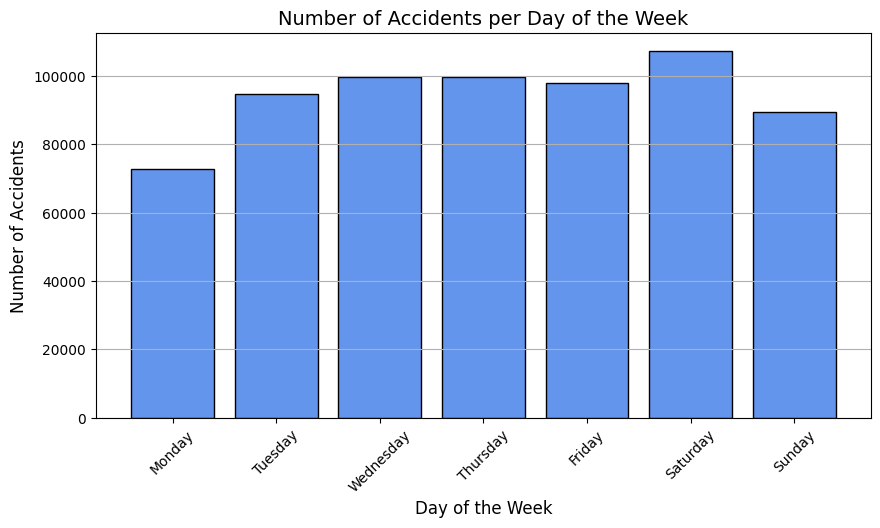

In [29]:
import matplotlib.pyplot as plt


day_counts = accident['Day'].value_counts()

# Sort by day order (Monday to Sunday)
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
day_counts = day_counts.reindex(day_order)


plt.figure(figsize=(10, 5))
plt.bar(day_counts.index, day_counts.values, color='cornflowerblue', edgecolor='black')

# Titles and labels
plt.title("Number of Accidents per Day of the Week", fontsize=14)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)  
plt.grid(axis='y')

# Show the plot
plt.show()


<h1>INSIGHT NO.6 - 7</h1>

<h1>1. Does unfavorable weather, poor road conditions, and inadequate lighting contribute to the number of recorded accidents?</h1>
<h3>Most accidents happen when weather, roads, and light are good. But bad conditions still cause some accidents.</h3>

<h1>2. Which road surface condition and light condition have the most accidents occurred in?</h1>
<h3>Most accidents occur on dry road surfaces and in daylight conditions..</h3>

In [30]:
slight_accident = accident[accident['Accident_Severity'] == 'Slight']
serious_accident = accident[accident['Accident_Severity'] == 'Serious']
fatal_accident = accident[accident['Accident_Severity'] == 'Fatal']

In [31]:
sort_slight = slight_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
sort_slight.sort_values(ascending=False)

Weather_Conditions     Road_Surface_Conditions         Light_Conditions           
Fine no high winds     Dry                             Daylight                       292712
                                                       Darkness - lights lit           55594
                       Wet or damp                     Daylight                        43481
Raining no high winds  Wet or damp                     Daylight                        43201
                                                       Darkness - lights lit           19158
                                                                                       ...  
                       Snow                            Darkness - lighting unknown         0
Fine + high winds      unknown road surface condition  Darkness - lights unlit             0
                                                       Darkness - lights lit               0
Other                  unknown road surface condition  Darkness - lighting unkno

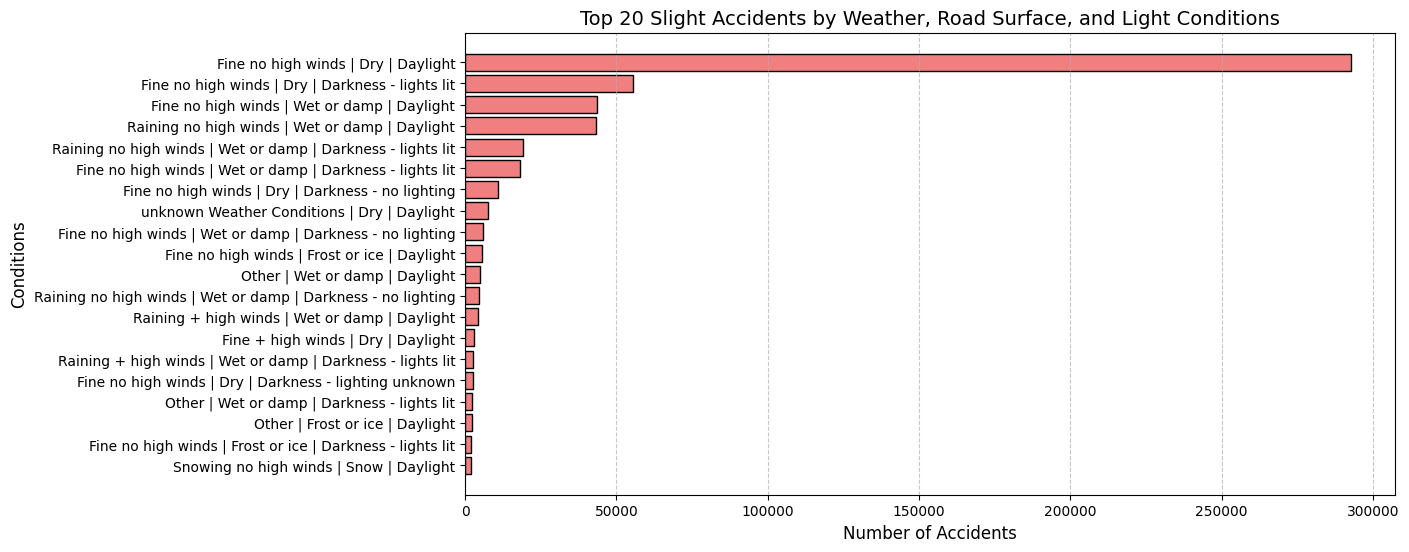

In [32]:

sort_slight = slight_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()

sort_slight = sort_slight.sort_values(ascending=False).head(20)

index_labels = [' | '.join(map(str, idx)) for idx in sort_slight.index]

plt.figure(figsize=(12, 6))
plt.barh(index_labels, sort_slight.values, color='lightcoral', edgecolor='black')


plt.title("Top 20 Slight Accidents by Weather, Road Surface, and Light Conditions", fontsize=14)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Conditions", fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [33]:
sort_serious = serious_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
sort_serious.sort_values(ascending=False)

Weather_Conditions     Road_Surface_Conditions  Light_Conditions           
Fine no high winds     Dry                      Daylight                       45105
                                                Darkness - lights lit          10599
                       Wet or damp              Daylight                        6050
Raining no high winds  Wet or damp              Daylight                        5143
Fine no high winds     Wet or damp              Darkness - lights lit           3361
                                                                               ...  
Fog or mist            Flood over 3cm. deep     Daylight                           0
Raining no high winds  Snow                     Darkness - lights unlit            0
                                                Darkness - lighting unknown        0
Fog or mist            Frost or ice             Darkness - lights unlit            0
Raining + high winds   Snow                     Darkness - lighting unknow

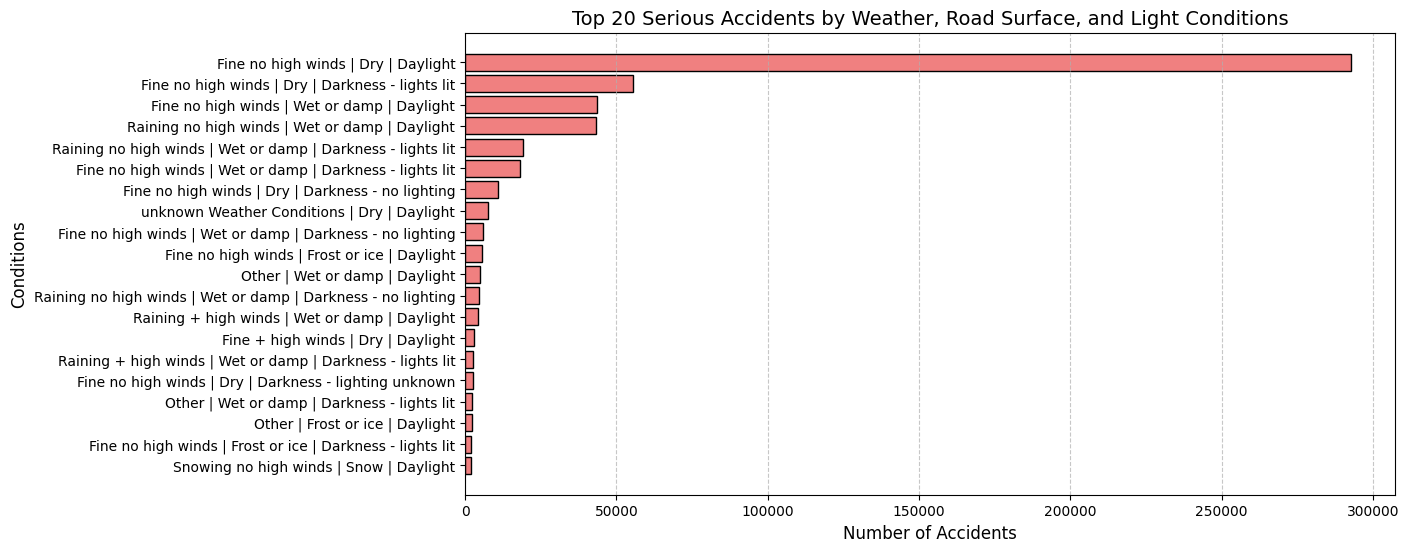

In [34]:


sort_serious = serious_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()

sort_serious = sort_serious.sort_values(ascending=False).head(20)


index_labels = [' | '.join(map(str, idx)) for idx in sort_slight.index]


plt.figure(figsize=(12, 6))
plt.barh(index_labels, sort_slight.values, color='lightcoral', edgecolor='black')


plt.title("Top 20 Serious Accidents by Weather, Road Surface, and Light Conditions", fontsize=14)
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Conditions", fontsize=12)
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [35]:
sort_fatal = fatal_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()
sort_fatal.sort_values(ascending=False)

Weather_Conditions     Road_Surface_Conditions  Light_Conditions           
Fine no high winds     Dry                      Daylight                       3676
                                                Darkness - lights lit          1039
                                                Darkness - no lighting          810
                       Wet or damp              Daylight                        584
Raining no high winds  Wet or damp              Daylight                        411
                                                                               ... 
Raining + high winds   Dry                      Darkness - lights lit             0
                                                Darkness - lights unlit           0
                                                Darkness - no lighting            0
                                                Daylight                          0
                       Snow                     Darkness - lighting unknown       0


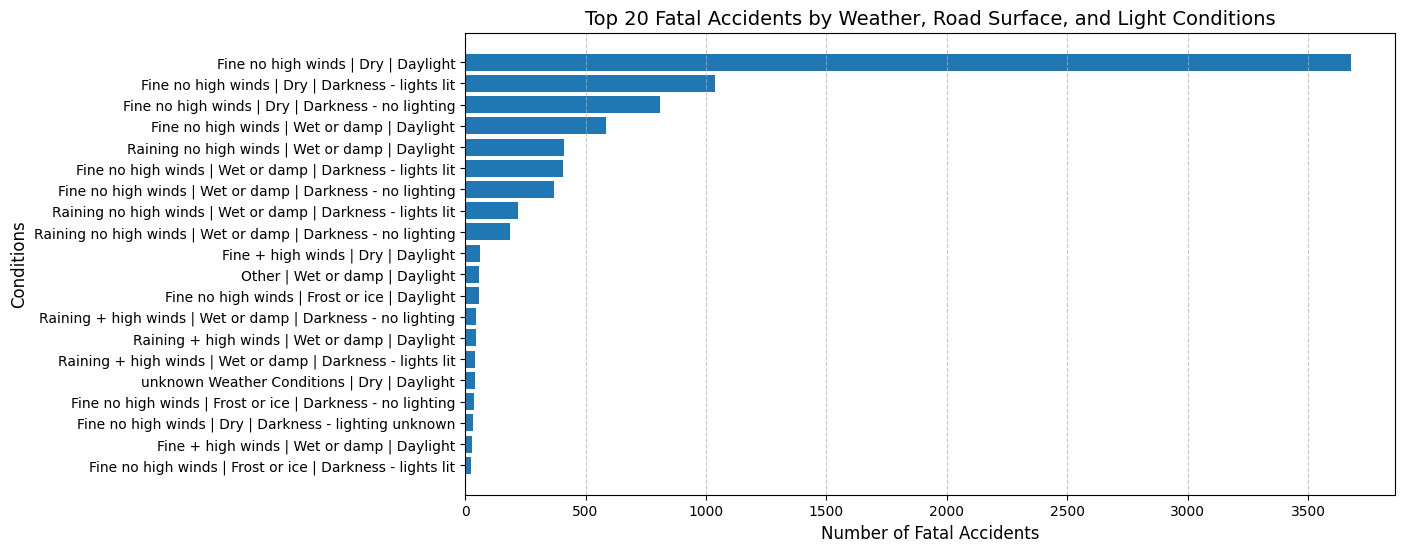

In [36]:

sort_fatal = fatal_accident.groupby(['Weather_Conditions', 'Road_Surface_Conditions', 'Light_Conditions']).size()


sort_fatal = sort_fatal.sort_values(ascending=False).head(20)


index_labels = [' | '.join(map(str, idx)) for idx in sort_fatal.index]


plt.figure(figsize=(12, 6))
plt.barh(index_labels, sort_fatal.values)


plt.title("Top 20 Fatal Accidents by Weather, Road Surface, and Light Conditions", fontsize=14)
plt.xlabel("Number of Fatal Accidents", fontsize=12)
plt.ylabel("Conditions", fontsize=12)
plt.gca().invert_yaxis()  
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<h1>INSIGHT NO.8</h1>

<h1>Which type of road has the most accidents?</h1>
<h3>Single carriageway has THE MOST ACCIDENT</h3>



In [37]:
road_type = accident.groupby(['Road_Type', 'Road_Surface_Conditions']).size()
road_type.unstack()

Road_Surface_Conditions,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,unknown road surface condition
Road_Type,,,,,,
Dual carriageway,66205,302,2408,909,29533,67
One way street,10068,5,183,76,3195,32
Roundabout,30698,22,745,232,12209,86
Single carriageway,332698,672,14918,4585,138743,527
Slip road,4714,9,178,60,2074,6
unknown Road Type,3438,7,85,28,954,8


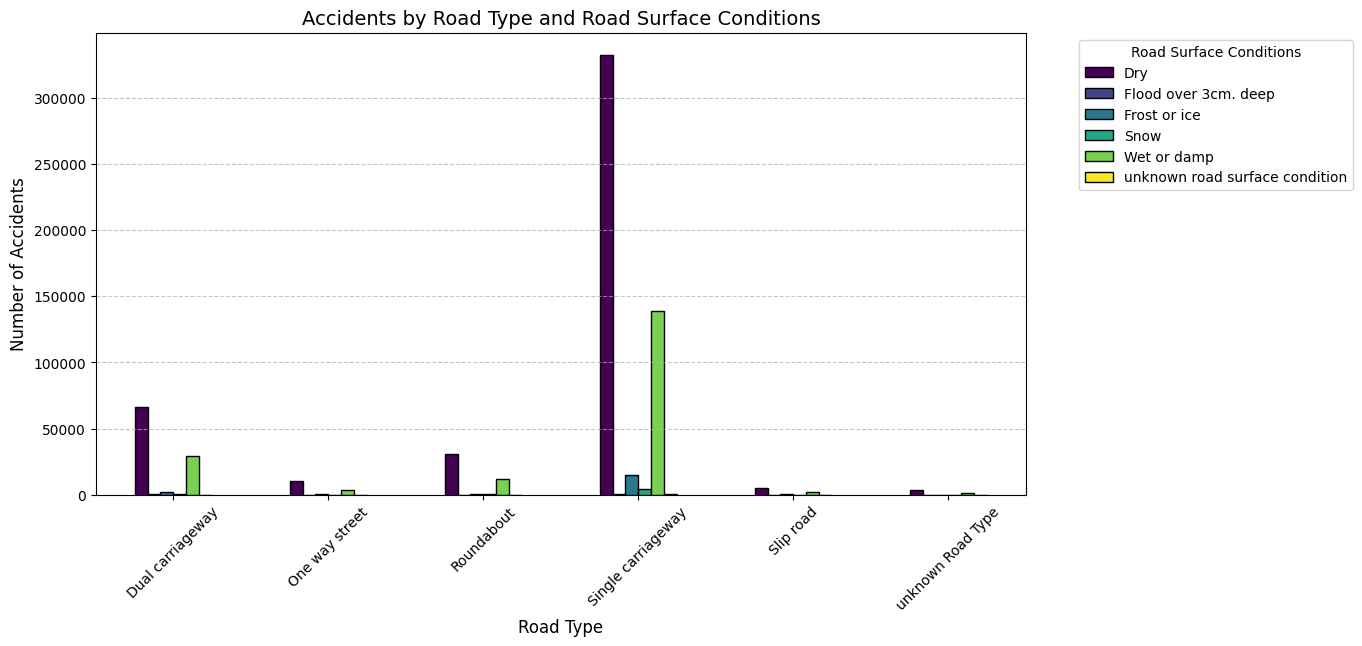

In [38]:

road_type = accident.groupby(['Road_Type', 'Road_Surface_Conditions']).size()
road_type_df = road_type.unstack()

road_type_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')


plt.title("Accidents by Road Type and Road Surface Conditions", fontsize=14)
plt.xlabel("Road Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title="Road Surface Conditions", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1>INSIGHTS NO. 9</h1>

<h2> What is the highest number of casualties recorded in a single accident?</h1>
<H3>Highest casualties in a single accident: 68</H3>

In [39]:
max_casualties = np.max(accident['Number_of_Casualties'])
max_casualties

68

In [40]:
severity_road_distribution = accident.groupby('Road_Type')['Accident_Severity'].value_counts()
print("16. Accident severity distribution by road type:")
severity_road_distribution

16. Accident severity distribution by road type:


Road_Type           Accident_Severity
Dual carriageway    Slight                85863
                    Serious               11746
                    Fatal                  1815
One way street      Slight                11809
                    Serious                1655
                    Fatal                    95
Roundabout          Slight                40185
                    Serious                3665
                    Fatal                   142
Single carriageway  Slight               415557
                    Serious               70059
                    Fatal                  6527
Slip road           Slight                 6381
                    Serious                 611
                    Fatal                    49
unknown Road Type   Slight                 4006
                    Serious                 481
                    Fatal                    33
Name: count, dtype: int64

<h1>INSIGHTS NO.10-13</h1>

<h2>What is the trend of fatal accidents over the years?</h2>
<h3>IN YEAR 2019 THE FATAL ACCIDENT OCCURED ARE 2714, IN YEAR 2020 THE FATAL ACCIDENT OCCURED ARE 2341, IN YEAR 2021 THE FATAL ACCIDENT OCCURED ARE 2057,1IN YEAR 2022 THE FATAL ACCIDENT OCCURED ARE 1549549 <

<h2>Which month has the highest number of accidents?</h2>
<h3>november has the month with highest number of accident</h3>

<h2> Which district has the highest number of serious and fatal accidents?</h2>
<h3>ALSO Birmingham has the highest number of serious and fatal accidents</h3>


/h3>9</H3>


In [41]:
fatal_accidents_per_year = accident[accident['Accident_Severity'] == 'Fatal']['Year'].value_counts().sort_index()

fatal_accidents_per_year.sum()

8661

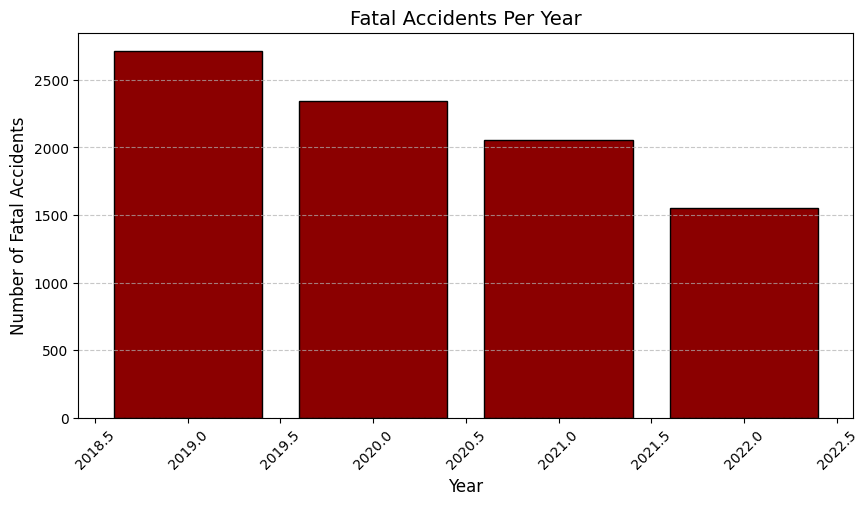

In [42]:
fatal_accidents_per_year = accident[accident['Accident_Severity'] == 'Fatal']['Year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(fatal_accidents_per_year.index, fatal_accidents_per_year.values, color='darkred', edgecolor='black')
plt.title("Fatal Accidents Per Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Fatal Accidents", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [43]:
accidents_per_month = accident.groupby('Month').size().sort_values(ascending=False)
accidents_per_month


Month
11    60424
10    59580
7     57445
6     56481
9     56455
5     56352
3     54086
8     53913
1     52872
12    51836
4     51744
2     49491
dtype: int64

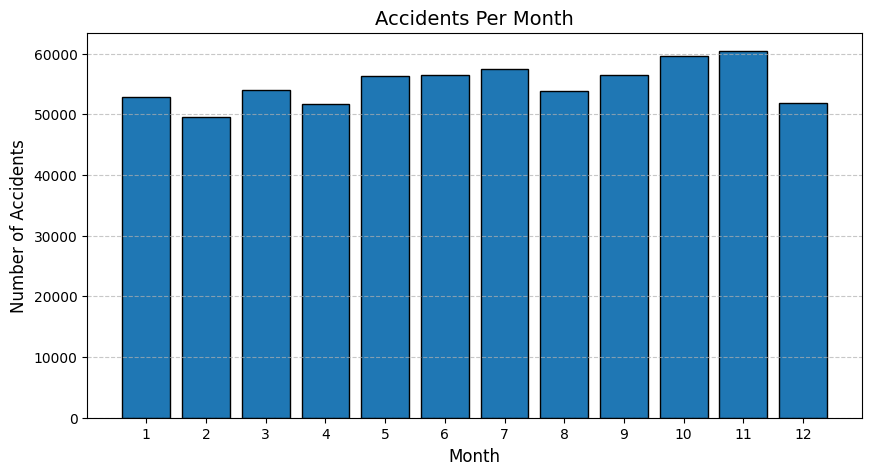

In [44]:
accidents_per_month = accident.groupby('Month').size().sort_values(ascending=False)


plt.figure(figsize=(10, 5))
plt.bar(accidents_per_month.index, accidents_per_month.values, edgecolor='black')
plt.title("Accidents Per Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [45]:
accidents_per_district = accident.groupby('District Area').size().sort_values(ascending=False)
accidents_per_district


District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Length: 422, dtype: int64

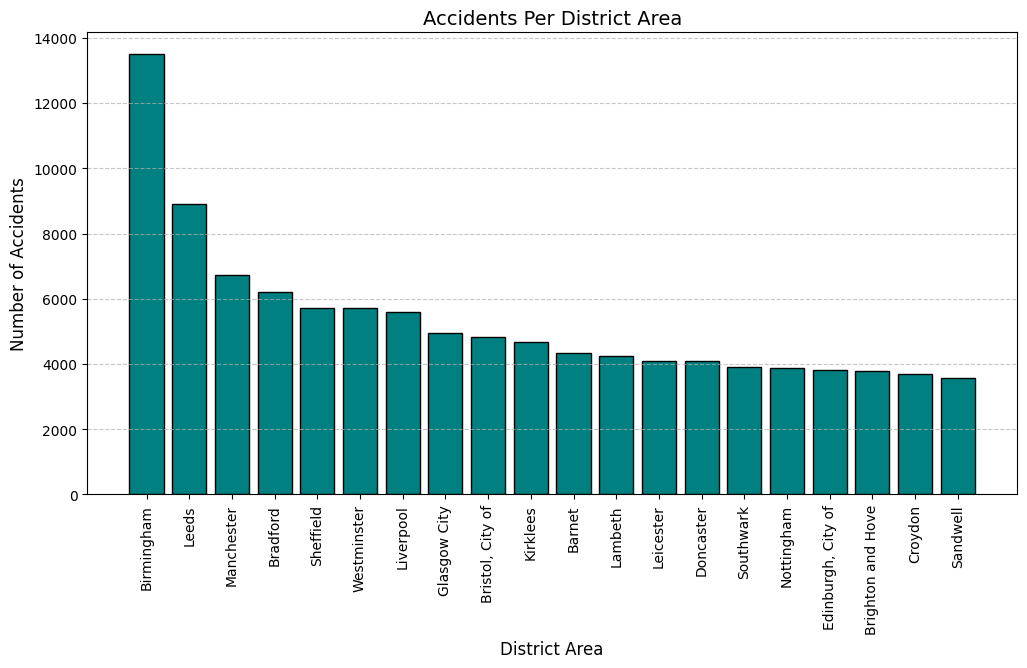

In [46]:
accidents_per_district = accident.groupby('District Area').size().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
plt.bar(accidents_per_district.index, accidents_per_district.values, color='teal', edgecolor='black')
plt.title("Accidents Per District Area", fontsize=14)
plt.xlabel("District Area", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [47]:
serious_fatal_accidents = accident[accident['Accident_Severity'].isin(['Serious', 'Fatal'])]
district_counts = serious_fatal_accidents['District Area'].value_counts()
district_counts


District Area
Birmingham                   1579
Leeds                        1240
Westminster                   970
Bradford                      873
Sheffield                     787
                             ... 
Chester-le-Street              27
Orkney Islands                 21
Shetland Islands               20
Clackmannanshire               19
London Airport (Heathrow)      11
Name: count, Length: 422, dtype: int64

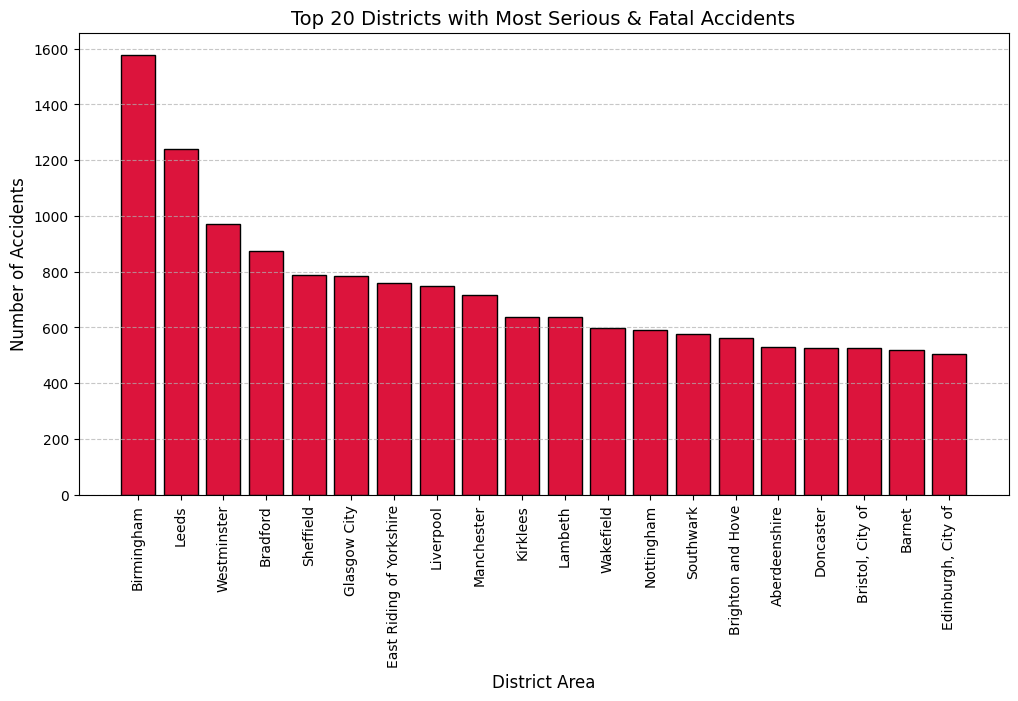

In [48]:
district_counts = serious_fatal_accidents['District Area'].value_counts().head(20)


plt.figure(figsize=(12, 6))
plt.bar(district_counts.index, district_counts.values, color='crimson', edgecolor='black')
plt.title("Top 20 Districts with Most Serious & Fatal Accidents", fontsize=14)
plt.xlabel("District Area", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=90) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1>INSIGHTS NO.14 - 15</h1>

<h2>What are the most common accident severities for each vehicle type?</h2>
<h3> CAR HAS THE MOST COMMON ACCIDENT FOR EARCH SEVERITY</h3>

<h2>What is the most common accident severity in urban vs. rural areas?</h2>
<hURBAN HAS THE MOST ACCIDENT OCCUREDnt</h3>>


In [49]:
severity_by_vehicle = accident.groupby(['Vehicle_Type', 'Accident_Severity']).size().unstack()
severity_by_vehicle

Accident_Severity,Fatal,Serious,Slight
Vehicle_Type,,,
Agricultural vehicle,21,282,1644
Bus or coach (17 or more pass seats),325,3373,22180
Car,6577,66461,424954
Data missing or out of range,0,0,6
Goods 7.5 tonnes mgw and over,216,2321,14770
Goods over 3.5t. and under 7.5t,67,857,5172
Minibus (8 - 16 passenger seats),29,276,1671
Motorcycle 125cc and under,189,2031,13049
Motorcycle 50cc and under,95,1014,6494


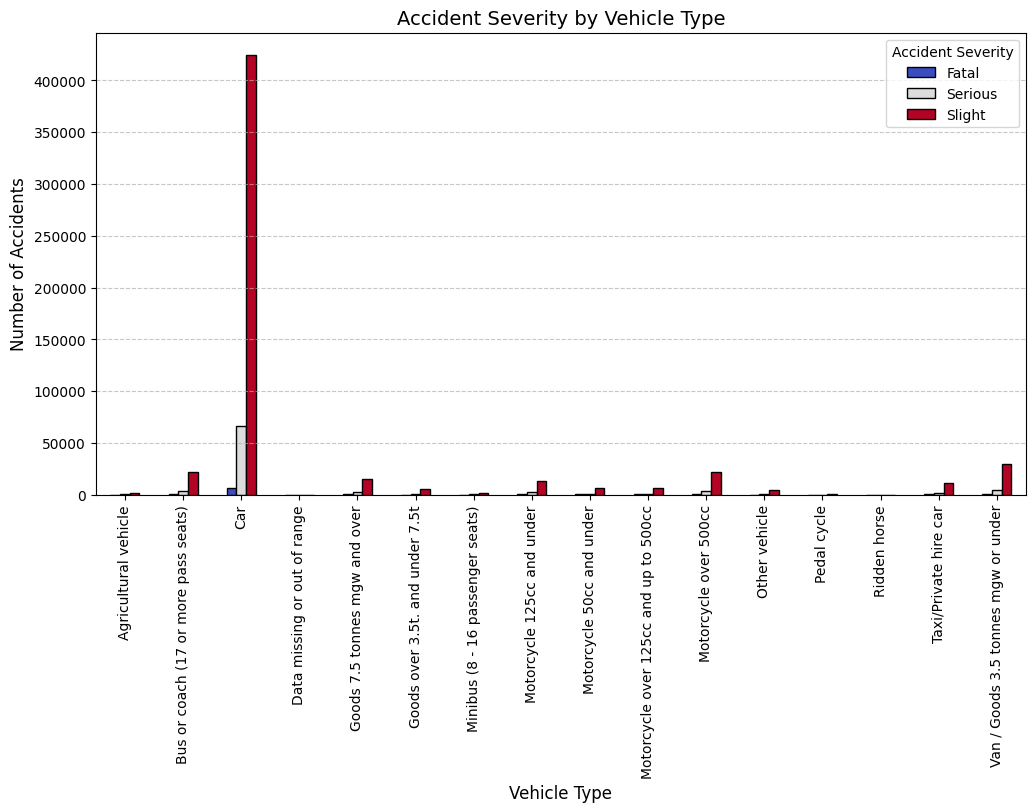

In [50]:
severity_by_vehicle.plot(kind='bar', figsize=(12, 6), colormap='coolwarm', edgecolor='black')

plt.title("Accident Severity by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=90) 
plt.legend(title="Accident Severity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [51]:
severity_by_area = accident.groupby(['Urban_or_Rural_Area', 'Accident_Severity']).size().unstack()
severity_by_area


Accident_Severity,Fatal,Serious,Slight
Urban_or_Rural_Area,,,
Rural,5601,37312,196077
Unallocated,0,1,10
Urban,3060,50904,367714


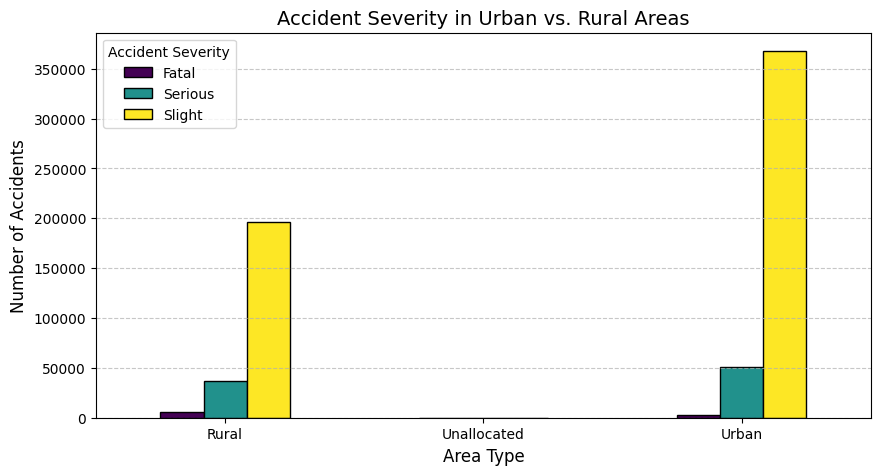

In [52]:
severity_by_area.plot(kind='bar', figsize=(10, 5), colormap='viridis', edgecolor='black')


plt.title("Accident Severity in Urban vs. Rural Areas", fontsize=14)
plt.xlabel("Area Type", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.xticks(rotation=0) 
plt.legend(title="Accident Severity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


<h1>INSIGHTS NO.15-20</h1>

<h2>On which day of the week do most accidents occur?</h2>
<h3> 15. SUNDAY HAS THE MOST ACCIDENT IN FATAL </h3>
<h3> 16. SATURDAY HAS THE MOST ACCIDENT IN Serious</h3>
<h3> 17. SATURDAY HAS THE MOST ACCIDENT IN Slight </h3>


<h2>On which day of the week do least accidents occur?</h2>
<h3> 18. WEDNESDAY HAS THE MOST ACCIDENT IN FATAL </h3>
<h3> 19. MONDAY HAS THE MOST ACCIDENT IN Serious</h3>
<h3> 20. MONDAY HAS THE MOST ACCIDENT IN Slight </h3>

In [53]:
accident_by_day = accident.groupby(['Accident_Severity', 'DayOfWeek']).size().unstack()
accident_by_day

DayOfWeek,0,1,2,3,4,5,6
Accident_Severity,,,,,,,
Fatal,1385,1105,1113,1097,1113,1326,1522
Serious,11664,11918,12488,12440,12633,14000,13074
Slight,59631,81527,85957,85974,84154,91852,74706


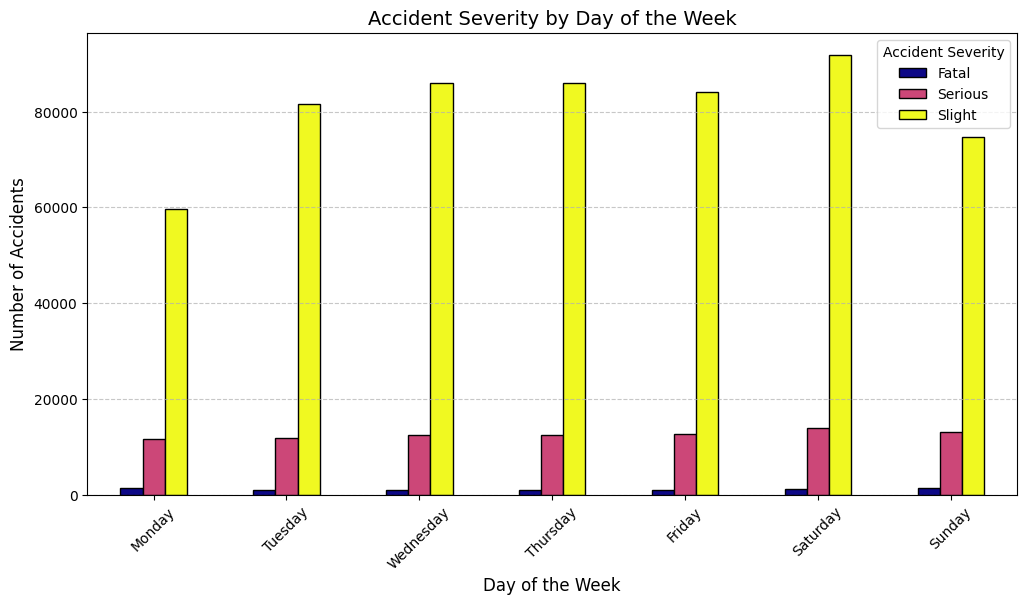

In [54]:
import matplotlib.pyplot as plt


day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]#ito


accident_day_per_week = accident_by_day.T.plot(kind='bar', figsize=(12, 6), colormap='plasma', edgecolor='black') #ito
accident_day_per_week.set_xticks(range(len(day_labels))) 
accident_day_per_week.set_xticklabels(day_labels, rotation=45) #ito


plt.title("Accident Severity by Day of the Week", fontsize=14) #ito
plt.xlabel("Day of the Week", fontsize=12) #ito
plt.ylabel("Number of Accidents", fontsize=12) #ito
plt.legend(title="Accident Severity")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() #ito


<h1>INSIGHTS NO.21 - 23</h1>

<h2>what district has least accident?</h2>
<h3> Clackmannanshire has the least accident </h3>

<h2> WHAT MONTH HAS THE LEAST ACCIDENT</h2>
<h3> februay has the least accident</h3>


In [55]:
least_accident_district = accident.groupby('District Area').size().sort_values(ascending=True)
least_accident_district  


District Area
Clackmannanshire         91
Orkney Islands          117
Shetland Islands        133
Teesdale                142
Berwick-upon-Tweed      153
                      ...  
Sheffield              5710
Bradford               6212
Manchester             6720
Leeds                  8898
Birmingham            13491
Length: 422, dtype: int64

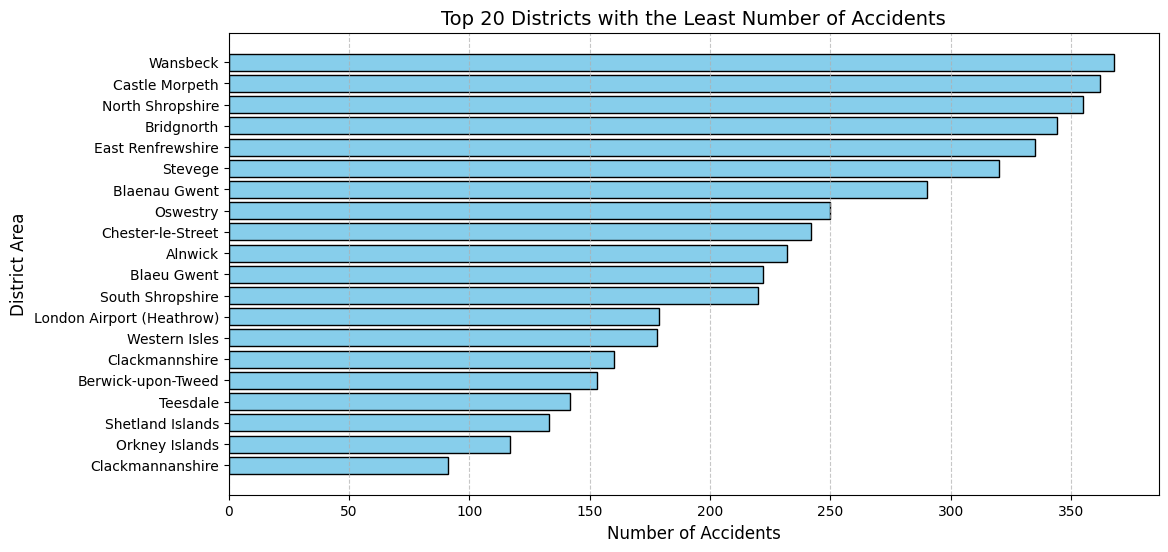

In [56]:
import matplotlib.pyplot as plt

least_accident_district_20 = least_accident_district.head(20)

plt.figure(figsize=(12, 6))
plt.barh(least_accident_district_20.index, least_accident_district_20.values, color='skyblue', edgecolor='black')
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("District Area", fontsize=12)
plt.title("Top 20 Districts with the Least Number of Accidents", fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [57]:
least_accident_month = accident.groupby('Month').size().sort_values(ascending=True)
least_accident_month


Month
2     49491
4     51744
12    51836
1     52872
8     53913
3     54086
5     56352
9     56455
6     56481
7     57445
10    59580
11    60424
dtype: int64

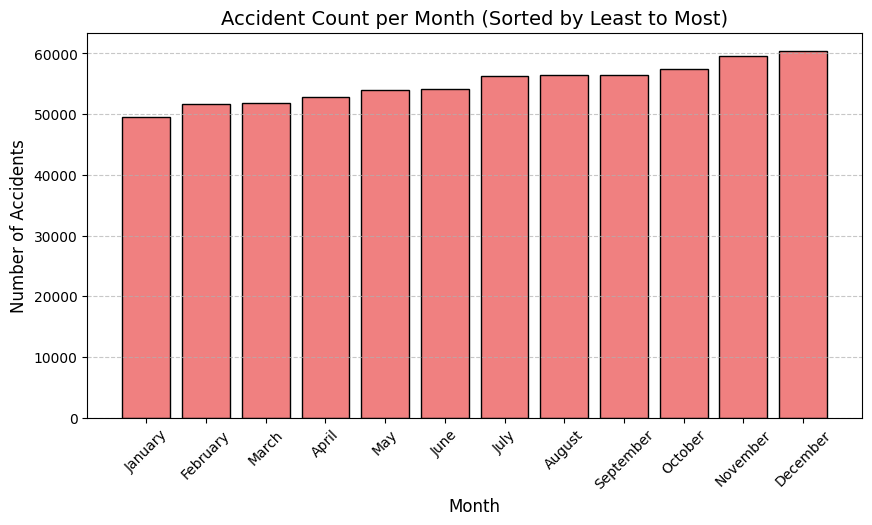

In [58]:
least_accident_month_sorted = least_accident_month.sort_values(ascending=True)

month_labels = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(10, 5))
plt.bar(month_labels, least_accident_month_sorted.values, color='lightcoral', edgecolor='black')

plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Accidents", fontsize=12)
plt.title("Accident Count per Month (Sorted by Least to Most)", fontsize=14)
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


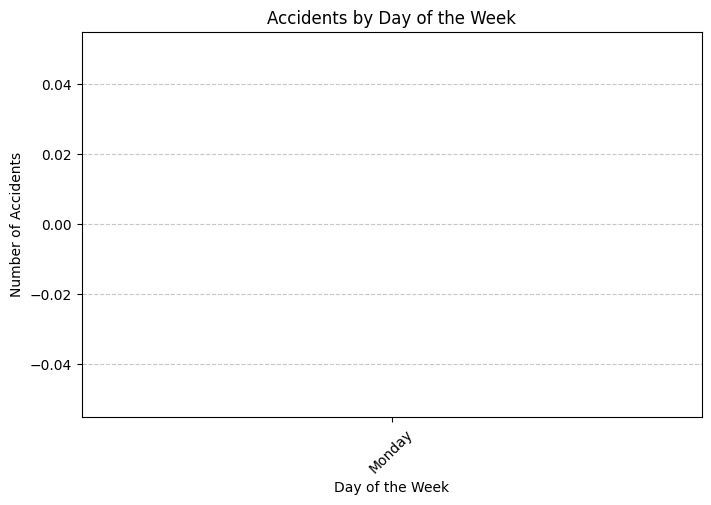

In [59]:
import matplotlib.pyplot as plt

# Group by 'DayOfWeek' and count occurrences
accident_by_day = accident.groupby('DayOfWeek').size()

# Define day labels in correct order
day_labels = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Sort the data based on the day order
accident_by_day = accident_by_day.reindex(day_labels)

# Plot the data
plt.figure(figsize=(8, 5))
plt.bar(day_labels, accident_by_day, color='skyblue')
plt.xlabel("Day of the Week")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Day of the Week")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()
